<a href="https://colab.research.google.com/github/DovTech/models_roofs_experiments/blob/main/yolov8_for_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
train = False

# Libs

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
import json
from tqdm import tqdm
import os
from PIL import Image

import albumentations as A
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn

!pip install ultralytics
import ultralytics
from ultralytics import YOLO

!pip install clearml
from clearml import Task, Logger

  Using cached clearml-1.12.2-py2.py3-none-any.whl (1.1 MB)
  Using cached furl-2.1.3-py2.py3-none-any.whl (20 kB)
  Using cached pathlib2-2.3.7.post1-py2.py3-none-any.whl (18 kB)
  Using cached PyJWT-2.4.0-py3-none-any.whl (18 kB)
  Using cached orderedmultidict-1.0.1-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [6]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=ZKLHZ1PO1XXHAJ7ADF1Q
%env CLEARML_API_SECRET_KEY=MvYMdSVXHq7syTKAOnZchTM7f89aIurInY0cBbknuTIpxTpdqN

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=ZKLHZ1PO1XXHAJ7ADF1Q
env: CLEARML_API_SECRET_KEY=MvYMdSVXHq7syTKAOnZchTM7f89aIurInY0cBbknuTIpxTpdqN


# Loads

In [23]:
gdown.download('https://drive.google.com/file/d/12bxte_WIFE9lGrcX-gO8aqV32GPPPaok/view?usp=sharing', fuzzy=True, quiet=False) #yolo_dataset.zip
gdown.download('https://drive.google.com/file/d/1IgkFcKqkTAO91S286xOjylEejvQrzkc4/view?usp=sharing', fuzzy=True, quiet=False) #yolov8.yaml
gdown.download('https://drive.google.com/file/d/1HiYhiqD2juhN5n1DWPamC9G6UHUrhMjx/view?usp=sharing', fuzzy=True)

!unzip /content/yolo_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1HiYhiqD2juhN5n1DWPamC9G6UHUrhMjx
To: /content/best.pt
100%|██████████| 6.73M/6.73M [00:00<00:00, 110MB/s]


'best.pt'

# Pathes

In [36]:
root = '/content/'
dataset_yaml = os.path.join(root, 'yolov8.yaml')
train_dir = os.path.join(root, 'yolo_dataset/train')
val_dir = os.path.join(root, 'yolo_dataset/val')
test_dir = os.path.join(root, 'yolo_dataset/test')
save_dir = os.path.join('/content/drive/MyDrive/roofs_task')
best_dir = '/content/best.pt'

# Train

In [9]:
ultralytics.checks()

Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [10]:
if train:
    task = Task.init(
        project_name='roofs_task/yolov8',
        task_name='task_2',
        tags='YOLOv8',
    )

In [11]:
if train:
    model = YOLO('/content/yolov8n-seg.pt', task='segment')
    model.train(data='/content/yolov8.yaml', epochs=10, imgsz=300)

In [12]:
if train:
    task.close()

# Test

In [159]:
test_imgs = [os.path.join(test_dir, 'images', x) for x in os.listdir(test_dir + '/images')[:9]]
model = YOLO(best_dir)
results = model(test_imgs)


0: 320x320 10 builds, 1: 320x320 15 builds, 2: 320x320 6 builds, 3: 320x320 2 builds, 4: 320x320 12 builds, 5: 320x320 6 builds, 6: 320x320 7 builds, 7: 320x320 6 builds, 8: 320x320 5 builds, 19.2ms
Speed: 0.9ms preprocess, 2.1ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 320)


In [160]:
def plot_imgs(imgs):
    n_images = len(imgs)
    plt.figure(figsize=(20, 50))
    for idx, image in enumerate(imgs):
        plt.subplot(n_images, 3, idx+1)
        img = image.plot()
        plt.xticks([]);
        plt.yticks([])
        plt.title(image.path)
        plt.imshow(img)
    plt.show()

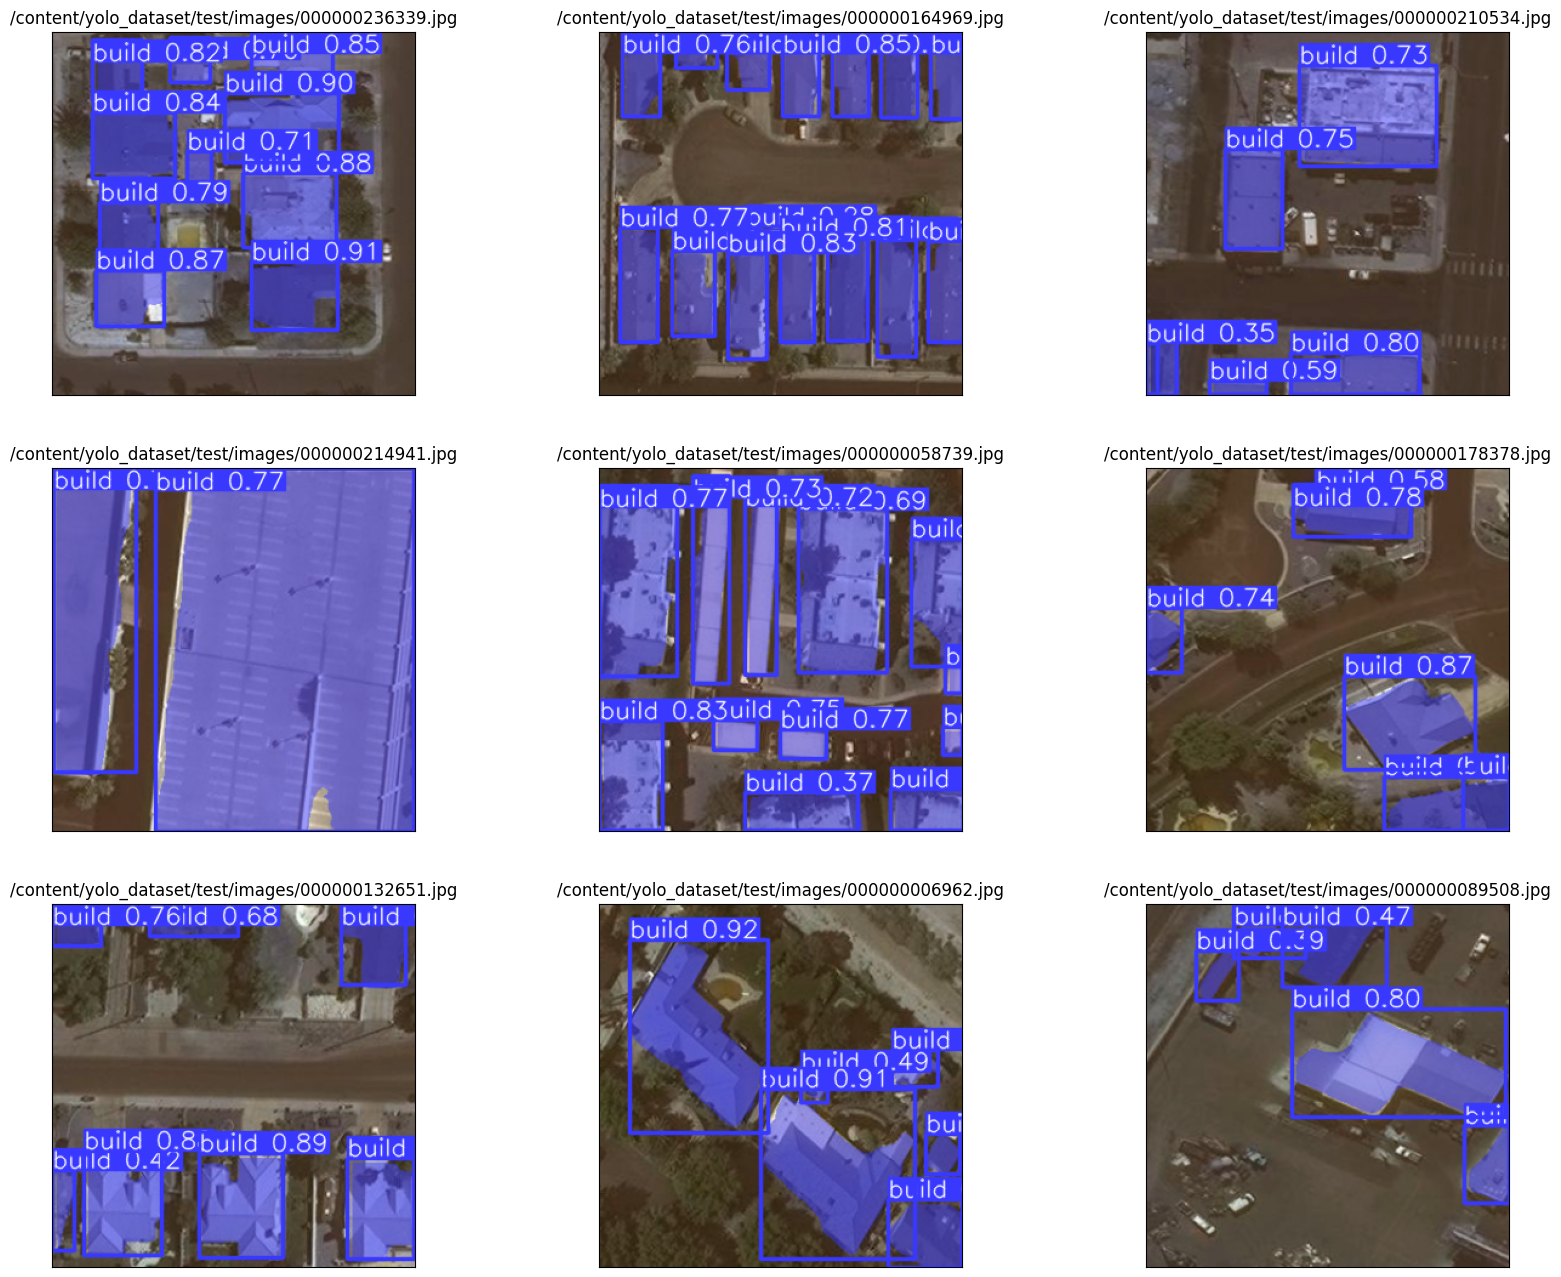

In [161]:
plot_imgs(results)